## 一、算法介绍

### 1.1 什么是层次聚类

层次聚类（Hierarchical Clustering）是一种通过构建层次结构来组织数据的聚类方法。与其他聚类算法不同，层次聚类不需要预先指定簇的数量，而是通过构建一个树状结构（树状图，Dendrogram）来展示数据的分层关系。层次聚类主要分为两类：

- **凝聚层次聚类（Agglomerative Hierarchical Clustering）**：自底向上，先将每个数据点视为一个单独的簇，然后逐步合并最相似的簇，直到所有数据点合并为一个簇或达到预定的簇数量。
  
- **分裂层次聚类（Divisive Hierarchical Clustering）**：自顶向下，先将所有数据点视为一个整体簇，然后逐步分裂成更小的簇，直到每个簇仅包含一个数据点或达到预定的簇数量。


## 二、算法原理

层次聚类的核心在于如何衡量簇与簇之间的相似性或距离，以及如何选择合适的链接方法来决定簇的合并或分裂。以下将详细介绍这些关键概念。

### 2.1 距离度量

在层次聚类中，常用的距离度量包括：

- **欧氏距离（Euclidean Distance）**：
  
  $$ d(\mathbf{x}, \mathbf{y}) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2} $$
  
- **曼哈顿距离（Manhattan Distance）**：
  
  $$ d(\mathbf{x}, \mathbf{y}) = \sum_{i=1}^{n} |x_i - y_i| $$
  
- **余弦相似度（Cosine Similarity）**：
  
  $$ \text{cos}(\theta) = \frac{\mathbf{x} \cdot \mathbf{y}}{\|\mathbf{x}\| \|\mathbf{y}\|} $$

### 2.2 链接方法

链接方法决定了如何计算两个簇之间的距离，常见的链接方法包括：

- **单链接（Single Linkage）**：簇之间的最小距离。
  
  $$ D(A, B) = \min \{ d(a, b) \mid a \in A, b \in B \} $$
  
- **全链接（Complete Linkage）**：簇之间的最大距离。
  
  $$ D(A, B) = \max \{ d(a, b) \mid a \in A, b \in B \} $$
  
- **平均链接（Average Linkage）**：簇之间所有点对的平均距离。
  
  $$ D(A, B) = \frac{1}{|A| |B|} \sum_{a \in A} \sum_{b \in B} d(a, b) $$
  
- **Ward法**：最小化簇内的方差增量。
  
  $$ D(A, B) = \sqrt{\frac{|A| |B|}{|A| + |B|}} \cdot \| \mathbf{c}_A - \mathbf{c}_B \| $$

其中，$\mathbf{c}_A$ 和 $\mathbf{c}_B$ 分别是簇 $A$ 和簇 $B$ 的中心。

### 2.3 算法流程

以**凝聚层次聚类**为例，其基本流程如下：

1. **初始化**：将每个数据点作为一个独立的簇。
2. **计算距离**：计算所有簇之间的距离，根据选择的链接方法确定簇间距离。
3. **合并簇**：找到距离最近的两个簇，将它们合并为一个新的簇。
4. **更新距离矩阵**：更新新簇与其他簇之间的距离。
5. **重复步骤3-4**，直到所有数据点合并为一个簇，或达到预定的簇数量。

## 三、案例分析

为了更好地理解层次聚类的应用，下面我们通过一个具体的案例进行分析。我们将使用Python中的`scikit-learn`库生成模拟数据，并实现层次聚类算法。

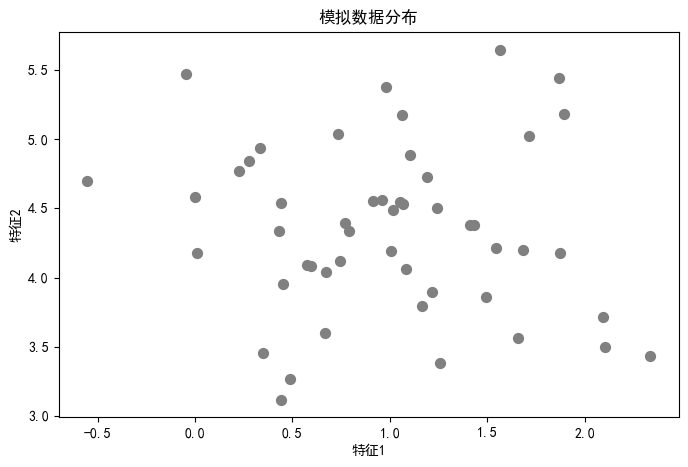

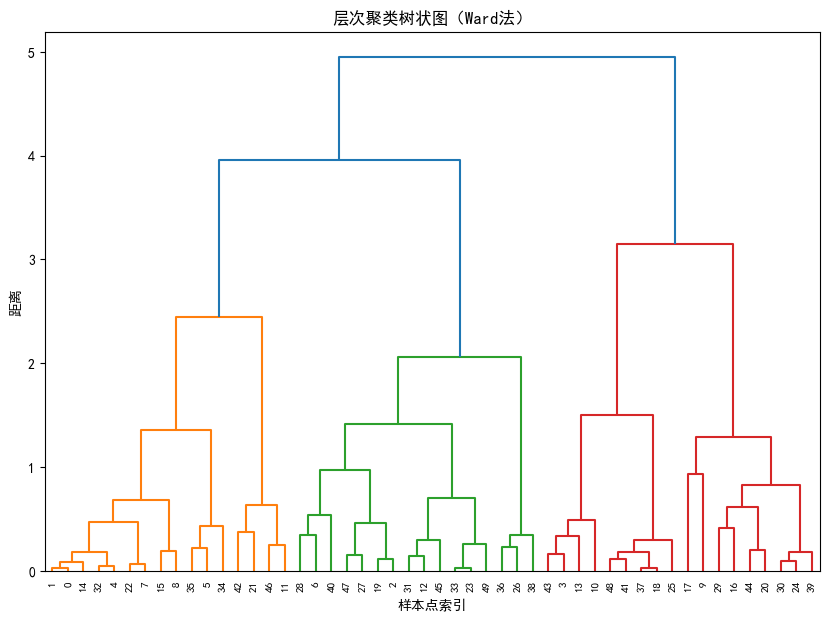

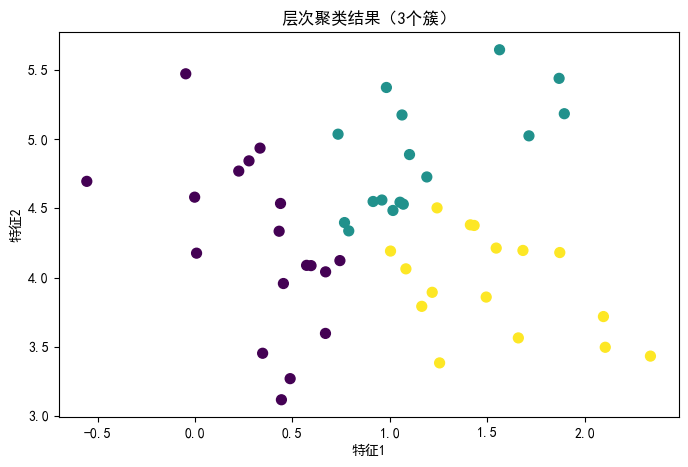

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
# 设置字体，解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体字体显示中文
plt.rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题

# 1. 生成模拟数据
X, y_true = make_blobs(n_samples=50, centers=1, cluster_std=0.60, random_state=0)

# 可视化数据
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], s=50, color='gray')
plt.title("模拟数据分布")
plt.xlabel("特征1")
plt.ylabel("特征2")
plt.show()

# 2. 构建层次聚类模型
linked = linkage(X, method='ward')

# 3. 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title("层次聚类树状图（Ward法）")
plt.xlabel("样本点索引")
plt.ylabel("距离")
plt.show()

# 4. 确定簇的数量并进行聚类
n_clusters = 3
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')  
cluster_labels = cluster.fit_predict(X)

# 5. 可视化聚类结果
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title(f"层次聚类结果（{n_clusters}个簇）")
plt.xlabel("特征1")
plt.ylabel("特征2")
plt.show()
